# 微积分
:label:`sec_calculus`

很长一段时间里，如何计算圆的面积一直是个谜。然后，在古希腊，数学家阿基米德提出了一个巧妙的想法，即在圆内画一系列顶点数量逐渐增加的多边形（:numref:`fig_circle_area`）。对于一个有 $n$ 个顶点的多边形，我们得到 $n$ 个三角形。当我们对圆进行更精细的分割时，每个三角形的高度接近半径 $r$。同时，它的底边接近 $2 \pi r/n$，因为在顶点数量较多的情况下，弧与割线之间的比率接近 1。因此，多边形的面积接近于 $n \cdot r \cdot \frac{1}{2} (2 \pi r/n) = \pi r^2$。

![Finding the area of a circle as a limit procedure.](../img/polygon-circle.svg)
:label:`fig_circle_area`

这种极限过程是*微分学*和*积分学*的基础。前者可以告诉我们如何通过操纵函数的参数来增加或减少函数的值。这在深度学习中遇到的*优化问题*中非常有用，我们在其中反复更新参数以减小损失函数。优化解决了如何将模型拟合到训练数据的问题，而微积分是其关键前提。然而，不要忘记我们的最终目标是在*以前未见过的*数据上表现良好。那个问题被称为*泛化*，将是其他章节的重点。

In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

## 导数与微分

简单来说，*导数*是函数相对于其自变量变化的变化率。导数可以告诉我们如果每个参数*增加*或*减少*一个无穷小的量时，损失函数会以多快的速度增加或减少。形式上，对于映射从实数到实数的函数 $f: \mathbb{R} \rightarrow \mathbb{R}$，
[**$f$ 在点 $x$ 处的*导数*定义为**]

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)
:eqlabel:`eq_derivative`

右侧的这个术语称为*极限*，它告诉我们当指定变量接近某个特定值时，表达式的值会发生什么变化。这个极限告诉我们，随着扰动 $h$ 的大小趋于零，扰动 $h$ 与函数值变化 $f(x + h) - f(x)$ 之间的比值收敛于什么。

当 $f'(x)$ 存在时，我们说 $f$ 在 $x$ 处是*可微的*；当 $f'(x)$ 对集合中的所有 $x$ 都存在时，例如区间 $[a,b]$，我们说 $f$ 在这个集合上是可微的。并不是所有的函数都是可微的，包括许多我们希望优化的函数，如准确率和接收者操作特征曲线下面积（AUC）。然而，因为计算损失函数的导数几乎是所有训练深度神经网络算法的关键步骤，我们经常优化一个可微的*替代函数*。

我们可以将导数 $f'(x)$ 解释为 $f(x)$ 相对于 $x$ 的*瞬时*变化率。让我们通过一个例子来发展一些直觉。（**定义 $u = f(x) = 3x^2-4x$。**）

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

[**设$x=1$，我们看到$\frac{f(x+h) - f(x)}{h}$**] (**当$h$趋近于$0$时，接近$2$。**)
虽然这个实验缺乏数学证明的严谨性，
但我们很快就能看出$f'(1) = 2$。

In [3]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


对于导数，有几种等价的记号约定。
给定 $y = f(x)$，以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号 $\frac{d}{dx}$ 和 $D$ 是*微分算子*。
下面，我们列出一些常见函数的导数：

$$\begin{aligned} \frac{d}{dx} C & = 0 && \textrm{对于任何常数 $C$} \\ \frac{d}{dx} x^n & = n x^{n-1} && \textrm{对于 } n \neq 0 \\ \frac{d}{dx} e^x & = e^x \\ \frac{d}{dx} \ln x & = x^{-1}. \end{aligned}$$

由可微函数组合而成的函数通常也是可微的。
以下规则在处理任何可微函数 $f$ 和 $g$ 及常数 $C$ 的复合时非常有用。

$$\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \textrm{常数倍规则} \\ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \textrm{和规则} \\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \textrm{乘积规则} \\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \textrm{商规则} \end{aligned}$$

利用这些规则，我们可以求得 $3 x^2 - 4x$ 的导数为

$$\frac{d}{dx} [3 x^2 - 4x] = 3 \frac{d}{dx} x^2 - 4 \frac{d}{dx} x = 6x - 4.$$

代入 $x = 1$ 显示，在该位置导数确实等于 $2$。注意，导数告诉我们函数在特定位置的*斜率*。

## 可视化工具

[**我们可以使用 `matplotlib` 库来可视化函数的斜率**]。
我们需要定义几个函数。
顾名思义，`use_svg_display` 告诉 `matplotlib` 以 SVG 格式输出图形，以获得更清晰的图像。注释 `#@save` 是一个特殊修饰符，允许我们将任何函数、类或其他代码块保存到 `d2l` 包中，以便稍后无需重复代码即可调用它，例如通过 `d2l.use_svg_display()`。

In [4]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

方便地，我们可以用`set_figsize`设置图形大小。
由于导入语句`from matplotlib import pyplot as plt`
在`d2l`包中通过`#@save`标记，我们可以调用`d2l.plt`。

In [5]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

`set_axes` 函数可以将坐标轴与属性关联，包括标签、范围和刻度。

In [6]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个函数，我们可以定义一个`plot`函数来叠加多条曲线。这里的大部分代码只是为了确保输入的大小和形状相匹配。

In [7]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数 $u = f(x)$ 及其在 $x=1$ 处的切线 $y = 2x - 3$**]，其中系数 $2$ 是切线的斜率。

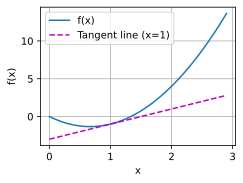

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数和梯度
:label:`subsec_calculus-grad`

到目前为止，我们一直在对只有一个变量的函数进行求导。
在深度学习中，我们也需要处理具有*多个*变量的函数。
我们简要介绍适用于这种*多变量*函数的导数概念。

设 $y = f(x_1, x_2, \ldots, x_n)$ 是一个具有 $n$ 个变量的函数。
$y$ 关于其第 $i$ 个参数 $x_i$ 的*偏导数*为

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算 $\frac{\partial y}{\partial x_i}$，
我们可以将 $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ 视为常数
并计算 $y$ 关于 $x_i$ 的导数。
以下偏导数的符号约定都很常见且意义相同：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

我们可以将多变量函数关于所有变量的偏导数连接起来
以获得一个称为该函数*梯度*的向量。
假设函数 $f: \mathbb{R}^n \rightarrow \mathbb{R}$ 的输入
是一个 $n$ 维向量 $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$
而输出是一个标量。
函数 $f$ 关于 $\mathbf{x}$ 的梯度是 $n$ 个偏导数的向量：

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$$ 

当没有歧义时，
$\nabla_{\mathbf{x}} f(\mathbf{x})$ 通常被替换为 $\nabla f(\mathbf{x})$。
以下规则对于多变量函数的求导非常有用：

* 对于所有 $\mathbf{A} \in \mathbb{R}^{m \times n}$ 我们有 $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$ 和 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$。
* 对于方阵 $\mathbf{A} \in \mathbb{R}^{n \times n}$ 我们有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$ 特别地
$\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$。

类似地，对于任何矩阵 $\mathbf{X}$，
我们有 $\nabla_{\mathbf{X}} \|\mathbf{X} \|_\textrm{F}^2 = 2\mathbf{X}$。



## 链式法则

在深度学习中，所关心的梯度往往难以计算
因为我们处理的是
深层嵌套的函数
（函数（函数...））。
幸运的是，*链式法则*可以解决这个问题。
回到单变量函数，
假设 $y = f(g(x))$
并且底层函数
$y=f(u)$ 和 $u=g(x)$
都是可微的。
链式法则表明


$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$



回到多变量函数，
假设 $y = f(\mathbf{u})$ 有变量
$u_1, u_2, \ldots, u_m$，
其中每个 $u_i = g_i(\mathbf{x})$
有变量 $x_1, x_2, \ldots, x_n$，
即 $\mathbf{u} = g(\mathbf{x})$。
那么链式法则表明

$$\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \ \textrm{ 因此 } \ \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y,$$

其中 $\mathbf{A} \in \mathbb{R}^{n \times m}$ 是一个*矩阵*
包含向量 $\mathbf{u}$
关于向量 $\mathbf{x}$ 的导数。
因此，计算梯度需要
计算向量-矩阵乘积。
这是线性代数成为构建深度学习系统
不可或缺的基石之一的关键原因之一。



## 讨论

虽然我们只是触及了一个深奥主题的表面，
但一些概念已经清晰可见：
首先，微分的组合规则可以常规应用，
使我们能够*自动*计算梯度。
这项任务不需要创造力，因此
我们可以将认知能力集中在其他地方。
其次，计算向量值函数的导数
要求我们在从输出到输入追踪变量依赖图时
乘以矩阵。
特别是，当我们评估一个函数时
这个图是按*正向*方向遍历的
而在计算梯度时
则是按*反向*方向遍历的。
后续章节将正式介绍反向传播，
这是一种应用链式法则的计算过程。

从优化的角度来看，梯度允许我们
确定如何移动模型的参数
以降低损失，
本书中使用的每一步优化算法
都需要计算梯度。

## 练习

1. 到目前为止，我们把导数的规则视为理所当然。
   使用定义和极限证明 (i) $f(x) = c$，(ii) $f(x) = x^n$，(iii) $f(x) = e^x$ 和 (iv) $f(x) = \log x$ 的性质。
1. 同样地，从第一原理证明乘法、加法和商法则。
1. 证明常数倍法则作为乘法规则的一个特例成立。
1. 计算 $f(x) = x^x$ 的导数。
1. $f'(x) = 0$ 对某个 $x$ 意味着什么？
   给出一个函数 $f$ 和一个位置 $x$ 的例子，这可能成立。
1. 绘制函数 $y = f(x) = x^3 - \frac{1}{x}$ 的图像
   并绘制其在 $x = 1$ 处的切线。
1. 找出函数 $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$ 的梯度。
1. 函数 $f(\mathbf{x}) = \|\mathbf{x}\|_2$ 的梯度是什么？当 $\mathbf{x} = \mathbf{0}$ 时会发生什么？
1. 你能写出 $u = f(x, y, z)$ 且 $x = x(a, b)$, $y = y(a, b)$, $z = z(a, b)$ 时的链式法则吗？
1. 给定一个可逆函数 $f(x)$，
   计算其逆函数 $f^{-1}(x)$ 的导数。
   这里我们有 $f^{-1}(f(x)) = x$ 以及反过来 $f(f^{-1}(y)) = y$。
   提示：在推导中使用这些性质。

[讨论](https://discuss.d2l.ai/t/33)